In [1]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.datasets

# Repository imports
from FFBrainNet import FFBrainNet
from FFLocalNet import FFLocalNet
from LocalNetBase import Options, UpdateScheme
from DataGenerator import random_halfspace_data
from train import *

---
# Train an FFBrainNet using regular gradient descent on all parameters:

In [2]:
# Generate some test data
N = 1000
X,y = random_halfspace_data(dim=4, n=2*N)
X_test = X[:N]
y_test = y[:N]
X_train = X[N:]
y_train = y[N:]

In [3]:
# Build a multi-layer, randomly connected, and capped feed-forward net
brain = FFBrainNet(n=4, m=2, l=4, w=20, p=0.5, cap=5, full_gd=True)

In [4]:
# Train the net using regular gradient descent on the params
losses, samples, acc = train_vanilla(X_train, y_train, brain, epochs=10, batch=100, lr=0.1)

INITIAL ACCURACY
Acc of class 0 :0.1840
Acc of class 1 :0.6320
epoch 0 Accuracy: 0.4080
Acc of class 0 :0.7020
Acc of class 1 :0.9440
Evaluating
Acc of class 0 :0.7020
Acc of class 1 :0.9440
epoch  1 Loss: 0.6424 Accuracy: 0.8230
Acc of class 0 :0.8500
Acc of class 1 :0.9680
Evaluating
Acc of class 0 :0.8500
Acc of class 1 :0.9680
epoch  2 Loss: 0.4756 Accuracy: 0.9090
Acc of class 0 :0.9140
Acc of class 1 :0.9460
Evaluating
Acc of class 0 :0.9140
Acc of class 1 :0.9460
epoch  3 Loss: 0.4042 Accuracy: 0.9300
Acc of class 0 :0.9100
Acc of class 1 :0.9620
Evaluating
Acc of class 0 :0.9100
Acc of class 1 :0.9620
epoch  4 Loss: 0.3879 Accuracy: 0.9360
Acc of class 0 :0.9300
Acc of class 1 :0.9740
Evaluating
Acc of class 0 :0.9300
Acc of class 1 :0.9740
epoch  5 Loss: 0.3748 Accuracy: 0.9520
Acc of class 0 :0.9660
Acc of class 1 :0.9720
Evaluating
Acc of class 0 :0.9660
Acc of class 1 :0.9720
epoch  6 Loss: 0.3611 Accuracy: 0.9690
Acc of class 0 :0.9640
Acc of class 1 :0.9800
Evaluating
Acc

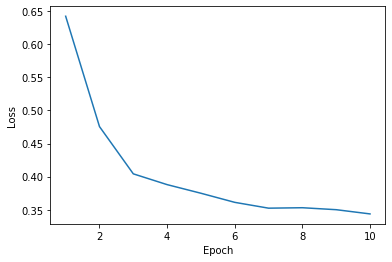

Last outer epoch loss: 0.34359043858977395


In [5]:
# Plot the learning curve
plt.plot(range(1, len(losses)+1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print('Last outer epoch loss:', losses[-1])

In [6]:
# Evaluate on test data
acc, pred_y = evaluate(X_test, y_test, 2, brain)
print('Test Accuracy:', acc)

Acc of class 0 :0.9454
Acc of class 1 :0.9733
Test Accuracy: 0.959


---
# Meta-Learn an Output-layer Plasticity Rule on halfspace data:

In [7]:
# Generate data
dimension = 4
N = 1000
X, y = random_halfspace_data(dim = dimension, n = 2*N)
X_test = X[:N]
y_test = y[:N]
X = X[N:]
y = y[N:]

In [8]:
# Set options to meta-learn output layer plasticity rule, while using regular GD on input weights directly
opts = Options(use_output_rule=True,
               gd_output_rule=True,
               gd_input=True)
scheme = UpdateScheme(update_misclassified=False, update_all_edges=True)

In [9]:
# Instantiate an FFLocalNet with 1 hidden layer, width 10
brain = FFLocalNet(n=4, m=2, l=1, w=10, p=0.5, cap=5, options=opts, update_scheme=scheme)

# Print initial output rule
print('brain output_fule:')
print(brain.get_output_rule())  # 2 x 2 x (cap+1), zero initialized

brain output_fule:
tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]])


Starting Train
Outer epoch  1
Acc of class 0 :0.9962
Acc of class 1 :0.2331
Train Accuracy: 0.6360
Acc of class 0 :0.9921
Acc of class 1 :0.1939
Test Accuracy: 0.5970
Current loss: 0.6807982820813816
Mean loss so far: 0.6807982820813816
Outer epoch  2
Acc of class 0 :0.9962
Acc of class 1 :0.3453
Train Accuracy: 0.6890
Acc of class 0 :0.9921
Acc of class 1 :0.2889
Test Accuracy: 0.6440
Current loss: 0.6578186218142154
Mean loss so far: 0.6693084519477985
Outer epoch  3
Acc of class 0 :0.9962
Acc of class 1 :0.4047
Train Accuracy: 0.7170
Acc of class 0 :0.9901
Acc of class 1 :0.3717
Test Accuracy: 0.6840
Current loss: 0.6369889709455874
Mean loss so far: 0.6585352916137281
Outer epoch  4
Acc of class 0 :1.0000
Acc of class 1 :0.5169
Train Accuracy: 0.7720
Acc of class 0 :0.9901
Acc of class 1 :0.4788
Test Accuracy: 0.7370
Current loss: 0.6159204185584998
Mean loss so far: 0.647881573349921
Outer epoch  5
Acc of class 0 :0.9886
Acc of class 1 :0.6610
Train Accuracy: 0.8340
Acc of class 0

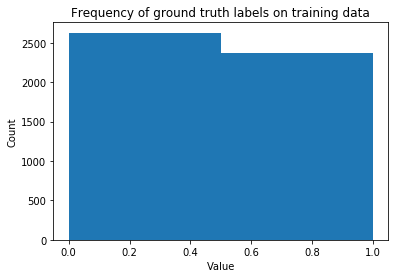

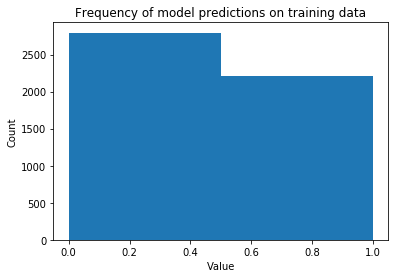

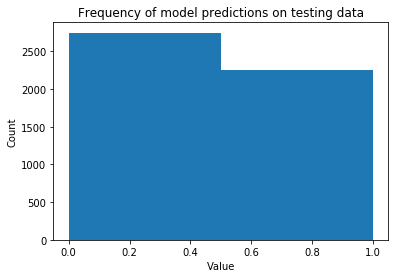

In [10]:
# Meta-Learn a plasticity rule for the output layer
losses, meta_train_acc, meta_test_acc, meta_stats = train_local_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    rule_epochs = 50,       # Number of times to run through the data
    epochs = 1,             # Number of time to run through a single batch for a single training pass
    batch = 100,            # Number of examples in a batch.
    lr = 1e-2,              # Learning Rate
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate network on test/train data each epoch

In [11]:
# Show updated output layer rule
print('brain output_layer_rule:')
print(brain.get_output_rule())

brain output_layer_rule:
tensor([[[ 0.0000e+00, -4.0997e-08, -2.2397e-01, -1.4144e-01, -7.8104e-01,
          -1.2818e+00],
         [ 0.0000e+00,  4.0997e-08,  2.2397e-01,  1.4144e-01,  7.8104e-01,
           1.2818e+00]],

        [[ 0.0000e+00, -4.4112e-08,  2.4936e-01,  1.3267e-01,  8.3331e-01,
           1.2839e+00],
         [ 0.0000e+00,  4.4112e-08, -2.4936e-01, -1.3267e-01, -8.3331e-01,
          -1.2839e+00]]], dtype=torch.float64)


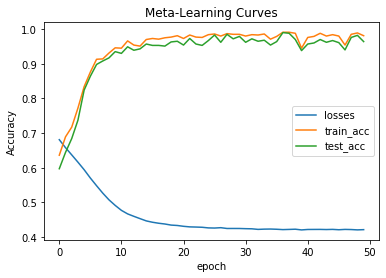

Last outer epoch loss: 0.42109210071661396
Last outer epoch train_accuracies: [0.981]
Last outer epoch test_accuracies: [0.964]


In [12]:
# Plot meta-learning curves
plt.plot(losses, label='losses')
plt.plot(meta_train_acc, label='train_acc')
plt.plot(meta_test_acc, label='test_acc')
plt.title('Meta-Learning Curves')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('Last outer epoch loss:', losses[-1])
print('Last outer epoch train_accuracies:', meta_train_acc[-1])
print('Last outer epoch test_accuracies:', meta_test_acc[-1])

## Retrain the **same data** using the learned plasticity rule:

Train on 0  examples.
Acc of class 0 :0.9129
Acc of class 1 :0.7203
Train Accuracy: 0.8220
Acc of class 0 :0.9109
Acc of class 1 :0.7515
Test Accuracy: 0.8320
Train on 500  examples.
Acc of class 0 :0.9773
Acc of class 1 :0.9831
Train Accuracy: 0.9800
Acc of class 0 :0.9663
Acc of class 1 :0.9535
Test Accuracy: 0.9600
Train on 999  examples.
Acc of class 0 :0.9773
Acc of class 1 :0.9894
Train Accuracy: 0.9830
Acc of class 0 :0.9762
Acc of class 1 :0.9576
Test Accuracy: 0.9670


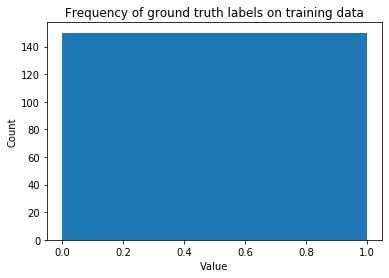

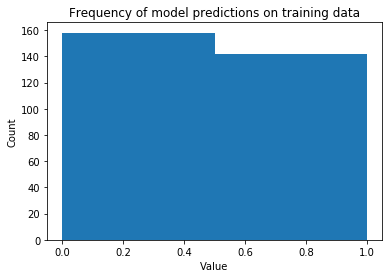

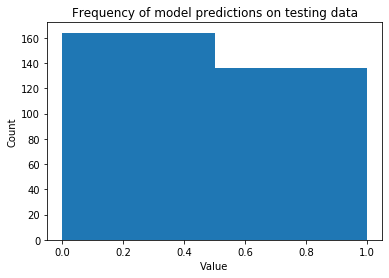

In [13]:
# NOTE: The output weights will be automatically reset during the first sample within train_given_rule()
plas_train_acc, plas_test_acc, plas_other_stats = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFLocalNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

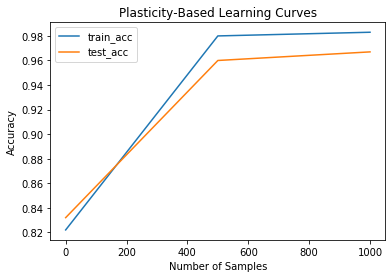

In [14]:
# Plot plasticity-based learning curves
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='train_acc')
plt.plot(plas_samples, plas_test_acc, label='test_acc')
plt.title('Plasticity-Based Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Train with the already learned rule on a **different** halfspace:
**NOTE**: the input weights learned from previous data will still be used

In [18]:
# Generate data.
dimension = 4
N = 5000
X, y = random_halfspace_data(dim=dimension, n=3*N)
X_test = X[:N]
y_test = y[:N]
X = X[N:]
y = y[N:]

Train on 0  examples.
Acc of class 0 :0.7472
Acc of class 1 :0.6443
Train Accuracy: 0.6958
Acc of class 0 :0.7722
Acc of class 1 :0.6262
Test Accuracy: 0.6996
Train on 500  examples.
Acc of class 0 :0.7610
Acc of class 1 :0.8805
Train Accuracy: 0.8207
Acc of class 0 :0.7793
Acc of class 1 :0.8648
Test Accuracy: 0.8218
Train on 1000  examples.
Acc of class 0 :0.7622
Acc of class 1 :0.8803
Train Accuracy: 0.8212
Acc of class 0 :0.7801
Acc of class 1 :0.8644
Test Accuracy: 0.8220
Train on 1500  examples.
Acc of class 0 :0.7622
Acc of class 1 :0.8829
Train Accuracy: 0.8225
Acc of class 0 :0.7805
Acc of class 1 :0.8676
Test Accuracy: 0.8238
Train on 2000  examples.
Acc of class 0 :0.7658
Acc of class 1 :0.8873
Train Accuracy: 0.8265
Acc of class 0 :0.7825
Acc of class 1 :0.8732
Test Accuracy: 0.8276
Train on 2500  examples.
Acc of class 0 :0.7654
Acc of class 1 :0.8905
Train Accuracy: 0.8279
Acc of class 0 :0.7829
Acc of class 1 :0.8769
Test Accuracy: 0.8296
Train on 3000  examples.
Acc of 

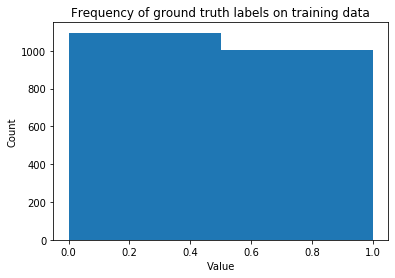

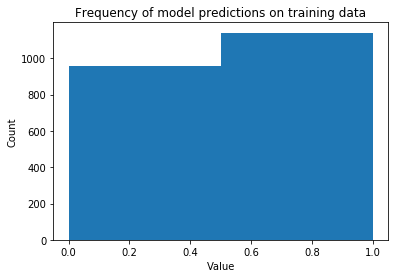

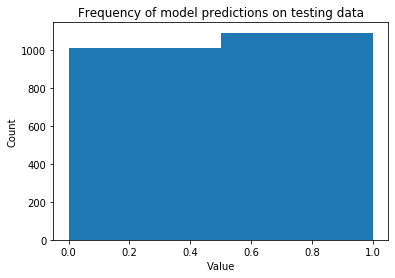

In [19]:
# NOTE: The output weights will be automatically reset during the first sample within train_given_rule()
plas_train_acc, plas_test_acc, plas_other_stats = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFLocalNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

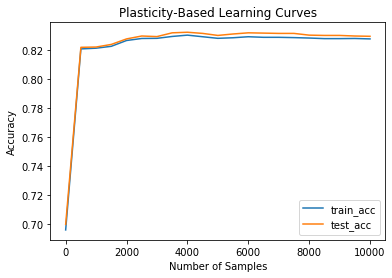

In [20]:
# Plot plasticity-based learning curves
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='train_acc')
plt.plot(plas_samples, plas_test_acc, label='test_acc')
plt.title('Plasticity-Based Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---
# Meta-Learn a Hidden-layer Plasticity Rule on halfspace data:

In [21]:
# Generate data
dimension = 4
N = 1000
X, y = random_halfspace_data(dim = dimension, n = 2*N)
X_test = X[:N]
y_test = y[:N]
X = X[N:]
y = y[N:]

In [22]:
# Set options to meta-learn a hidden layer plasticity rule, while using regular GD on input and output weights directly
opts = Options(use_graph_rule=True,
               gd_graph_rule=True,
               gd_input=True,
               gd_output=True)
scheme = UpdateScheme(update_misclassified=False, update_all_edges=True)

In [23]:
# Instantiate an FFLocalNet with 2 hidden layers, width 20
brain = FFLocalNet(n=4, m=2, l=2, w=20, p=0.5, cap=10, options=opts, update_scheme=scheme)

# Print initial rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())  # 2 x 2 x (cap+1), randomly initialized

brain hidden_layer_rule:
tensor([[[-1.0338, -0.2066, -2.3467, -0.2908,  0.2223,  1.1049, -1.1283,
          -1.1232,  0.1708, -0.0373,  0.8068],
         [-0.2869, -1.2434,  0.6785,  0.3643,  0.8035, -0.6199, -0.3900,
           0.1297,  1.4426, -0.0977, -1.0109]],

        [[ 0.7293,  1.2975,  0.3637, -1.0521, -0.6787,  2.6047,  0.1073,
          -0.9721, -0.1511,  1.2595,  0.6162],
         [-0.3709,  0.2644, -2.1319,  0.8651,  1.1049, -0.0739,  1.2406,
          -2.2610,  0.3139,  0.0233, -1.1058]]])


Starting Train
Outer epoch  1
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5180
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Test Accuracy: 0.5240
Current loss: 0.7743057196372373
Mean loss so far: 0.7743057196372373
Outer epoch  2
Acc of class 0 :0.0000
Acc of class 1 :1.0000
Train Accuracy: 0.5180
Acc of class 0 :0.0042
Acc of class 1 :1.0000
Test Accuracy: 0.5260
Current loss: 0.7397541986717932
Mean loss so far: 0.7570299591545152
Outer epoch  3
Acc of class 0 :0.6515
Acc of class 1 :0.7819
Train Accuracy: 0.7190
Acc of class 0 :0.6303
Acc of class 1 :0.7576
Test Accuracy: 0.6970
Current loss: 0.6945811513514342
Mean loss so far: 0.7362136898868216
Outer epoch  4
Acc of class 0 :0.6349
Acc of class 1 :0.7780
Train Accuracy: 0.7090
Acc of class 0 :0.6324
Acc of class 1 :0.7443
Test Accuracy: 0.6910
Current loss: 0.6632680264814436
Mean loss so far: 0.7179772740354771
Outer epoch  5
Acc of class 0 :0.9046
Acc of class 1 :0.4865
Train Accuracy: 0.6880
Acc of class 

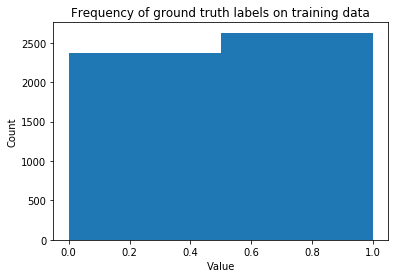

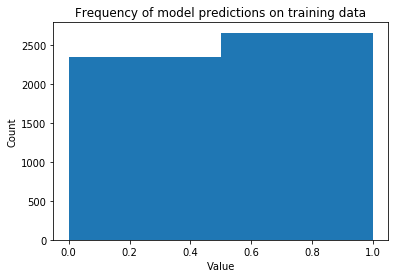

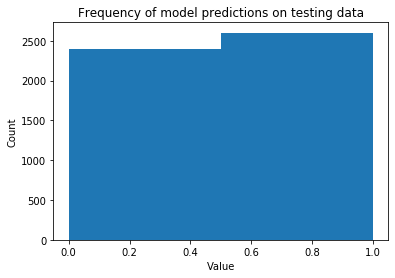

In [24]:
# Meta-Learn a single plasticity rule between the two hidden layers
losses, meta_train_acc, meta_test_acc, meta_stats = train_local_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFBrainNet
    rule_epochs = 50,       # Number of times to run through the data
    epochs = 1,             # Number of time to run through a single batch for a single training pass
    batch = 100,            # Number of examples in a batch.
    lr = 1e-2,              # Learning Rate
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate network on test/train data each epoch

(array([2341., 2659.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

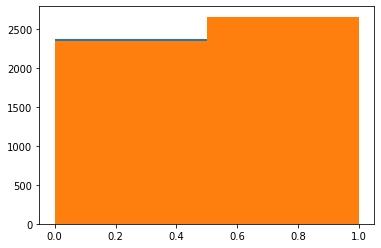

In [25]:
all_true_y, all_pred_y = meta_stats[:2]
all_true_y = np.array(all_true_y, dtype=np.int32)
all_pred_y = np.array(all_pred_y, dtype=np.int32)
plt.hist(all_true_y, bins=2)
plt.hist(all_pred_y, bins=2)

In [26]:
# Show updated hidden layer rule
print('brain hidden_layer_rule:')
print(brain.get_hidden_layer_rule())

brain hidden_layer_rule:
tensor([[[ 2.8826e-05,  1.4302e-02,  2.5756e-01,  9.8001e-01,  8.6548e-01,
           4.8093e-01,  5.8643e-03,  1.2394e-02,  2.4836e-03,  6.8387e-05,
          -2.4757e-11],
         [ 1.4251e-12, -2.1596e-06,  1.4396e-02,  1.1364e-01,  4.2520e-01,
           4.2625e-01,  3.2347e-01,  1.4326e-01,  3.5757e-02, -9.6385e-03,
          -5.4860e-09]],

        [[ 3.6348e-11,  2.7615e-04,  6.0207e-02,  1.9411e-01,  3.3090e-01,
           5.4820e-01,  1.3307e-01,  3.8816e-02,  1.6168e-02,  2.1150e-03,
           1.2690e-11],
         [ 2.3897e-12, -1.5405e-08, -1.7209e-02,  4.6574e-02,  3.3389e-01,
           7.1581e-01,  1.2133e+00,  6.0667e-01,  3.0666e-01,  9.8760e-02,
           4.8251e-08]]], dtype=torch.float64)


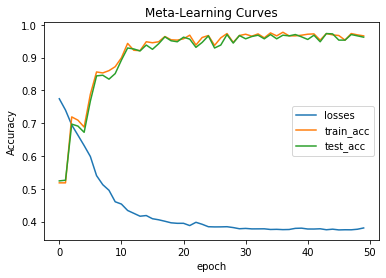

Last outer epoch loss: 0.38056363849844194
Last outer epoch train_accuracies: [0.966]
Last outer epoch test_accuracies: [0.962]


In [27]:
# Plot meta-learning curves
plt.plot(losses, label='losses')
plt.plot(meta_train_acc, label='train_acc')
plt.plot(meta_test_acc, label='test_acc')
plt.title('Meta-Learning Curves')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print('Last outer epoch loss:', losses[-1])
print('Last outer epoch train_accuracies:', meta_train_acc[-1])
print('Last outer epoch test_accuracies:', meta_test_acc[-1])

## Retrain the **same data** using the learned plasticity rule:

Train on 0  examples.
Acc of class 0 :1.0000
Acc of class 1 :0.0077
Train Accuracy: 0.4860
Acc of class 0 :1.0000
Acc of class 1 :0.0019
Test Accuracy: 0.4770
Train on 500  examples.
Acc of class 0 :0.9730
Acc of class 1 :0.9730
Train Accuracy: 0.9730
Acc of class 0 :0.9559
Acc of class 1 :0.9695
Test Accuracy: 0.9630
Train on 999  examples.
Acc of class 0 :0.9710
Acc of class 1 :0.9730
Train Accuracy: 0.9720
Acc of class 0 :0.9580
Acc of class 1 :0.9771
Test Accuracy: 0.9680


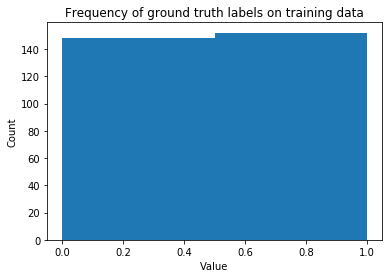

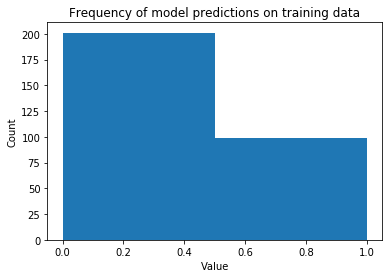

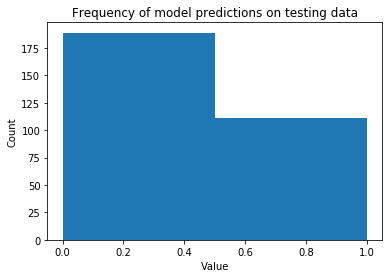

In [28]:
# NOTE: The hidden layer weights will be automatically reset during the first sample within train_given_rule()
plas_train_acc, plas_test_acc, plas_other_stats = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFLocalNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

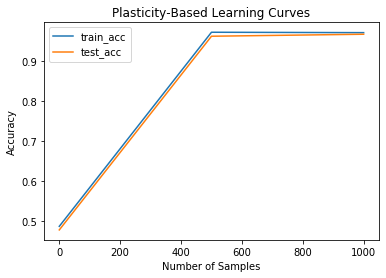

In [29]:
# Plot plasticity-based learning curves
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='train_acc')
plt.plot(plas_samples, plas_test_acc, label='test_acc')
plt.title('Plasticity-Based Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Train with the already learned rule on a **different** halfspace:
**NOTE**: the input weights learned from previous data will still be used

In [33]:
# Generate data.
dimension = 4
N = 5000
X, y = random_halfspace_data(dim=dimension, n=3*N)
X_test = X[:N]
y_test = y[:N]
X = X[N:]
y = y[N:]

Train on 0  examples.
Acc of class 0 :0.9730
Acc of class 1 :0.2336
Train Accuracy: 0.6001
Acc of class 0 :0.9700
Acc of class 1 :0.2354
Test Accuracy: 0.6124
Train on 500  examples.
Acc of class 0 :0.6800
Acc of class 1 :0.7101
Train Accuracy: 0.6952
Acc of class 0 :0.6878
Acc of class 1 :0.7091
Test Accuracy: 0.6982
Train on 1000  examples.
Acc of class 0 :0.6841
Acc of class 1 :0.7083
Train Accuracy: 0.6963
Acc of class 0 :0.6890
Acc of class 1 :0.7108
Test Accuracy: 0.6996
Train on 1500  examples.
Acc of class 0 :0.6837
Acc of class 1 :0.7081
Train Accuracy: 0.6960
Acc of class 0 :0.6859
Acc of class 1 :0.7099
Test Accuracy: 0.6976
Train on 2000  examples.
Acc of class 0 :0.6847
Acc of class 1 :0.7069
Train Accuracy: 0.6959
Acc of class 0 :0.6886
Acc of class 1 :0.7091
Test Accuracy: 0.6986
Train on 2500  examples.
Acc of class 0 :0.6859
Acc of class 1 :0.7059
Train Accuracy: 0.6960
Acc of class 0 :0.6913
Acc of class 1 :0.7087
Test Accuracy: 0.6998
Train on 3000  examples.
Acc of 

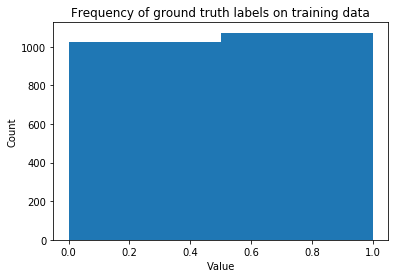

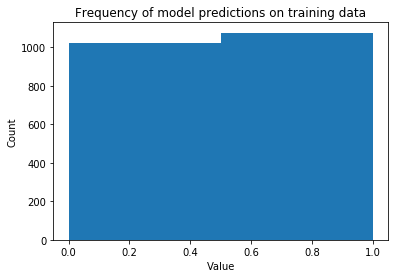

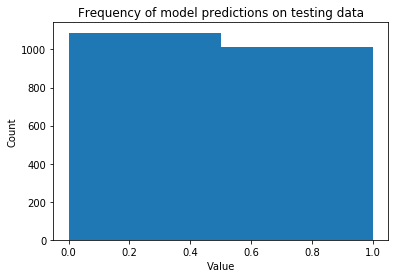

In [34]:
# NOTE: The output weights will be automatically reset during the first sample within train_given_rule()
plas_train_acc, plas_test_acc, plas_other_stats = train_given_rule(
    X,                      # Training Examples
    y,                      # Training Labels
    brain,                  # The FFLocalNet
    X_test = X_test,
    y_test = y_test,
    verbose = True)         # Evaluate the network every 500 samples

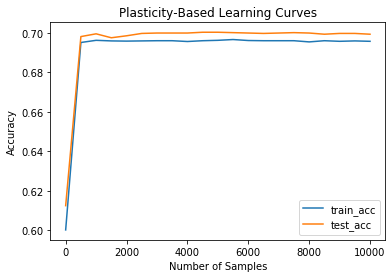

In [35]:
# Plot plasticity-based learning curves
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='train_acc')
plt.plot(plas_samples, plas_test_acc, label='test_acc')
plt.title('Plasticity-Based Learning Curves')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---

# Validate Output Layer meta-learning by recreating **Figure 2**

In [2]:
# Bring in MNIST
mnist_train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=None)

X_train = np.array([np.array(pair[0]).flatten() for pair in mnist_train]) / 255.0
y_train = np.array([pair[1] for pair in mnist_train])
X_test = np.array([np.array(pair[0]).flatten() for pair in mnist_test]) / 255.0
y_test = np.array([pair[1] for pair in mnist_test])

Train with full GD on MNIST with one hidden layer, w=1000 \
This should be similar to the benchmark GD case for Figure 2 (GD-Trained w/ batch=200)

In [3]:
brain = FFBrainNet(n=784, m=10, l=1, w=1000, p=0.1, cap=100, full_gd=True)
losses, gd_samples, gd_accuracies = train_vanilla(X_train, y_train, brain, epochs=2, batch=200, lr=1e-3)

INITIAL ACCURACY
Acc of class 0 :0.0098
Acc of class 1 :0.0053
Acc of class 2 :0.0317
Acc of class 3 :0.1187
Acc of class 4 :0.1018
Acc of class 5 :0.0719
Acc of class 6 :0.1038
Acc of class 7 :0.0607
Acc of class 8 :0.4956
Acc of class 9 :0.0466
epoch 0 Accuracy: 0.1028
Acc of class 0 :0.0122
Acc of class 1 :0.0271
Acc of class 2 :0.0262
Acc of class 3 :0.1954
Acc of class 4 :0.1652
Acc of class 5 :0.0965
Acc of class 6 :0.1242
Acc of class 7 :0.0841
Acc of class 8 :0.5594
Acc of class 9 :0.1232
Acc of class 0 :0.0130
Acc of class 1 :0.0780
Acc of class 2 :0.0198
Acc of class 3 :0.3593
Acc of class 4 :0.2516
Acc of class 5 :0.0968
Acc of class 6 :0.1639
Acc of class 7 :0.1239
Acc of class 8 :0.5623
Acc of class 9 :0.2150
Acc of class 0 :0.0160
Acc of class 1 :0.2087
Acc of class 2 :0.0181
Acc of class 3 :0.4714
Acc of class 4 :0.3365
Acc of class 5 :0.1068
Acc of class 6 :0.2146
Acc of class 7 :0.1662
Acc of class 8 :0.5943
Acc of class 9 :0.2927
Acc of class 0 :0.0196
Acc of class 1 

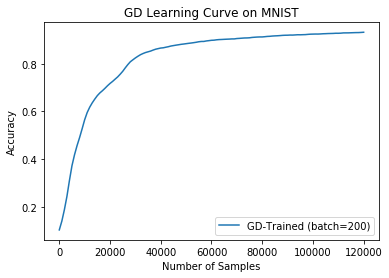

In [4]:
plt.plot(gd_samples, gd_accuracies, label='GD-Trained (batch=200)')
plt.title('GD Learning Curve on MNIST')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now compare this to learning via an output plasticity rule. \
We'll first meta-learn an output rule using MNIST:

Starting Train
Outer epoch  1
Acc of class 0 :0.8563
Acc of class 1 :0.9242
Acc of class 2 :0.5117
Acc of class 3 :0.6513
Acc of class 4 :0.7104
Acc of class 5 :0.2079
Acc of class 6 :0.5436
Acc of class 7 :0.6833
Acc of class 8 :0.7161
Acc of class 9 :0.3071
Train Accuracy: 0.6190
Acc of class 0 :0.8510
Acc of class 1 :0.9304
Acc of class 2 :0.5136
Acc of class 3 :0.7010
Acc of class 4 :0.7312
Acc of class 5 :0.2209
Acc of class 6 :0.5699
Acc of class 7 :0.6868
Acc of class 8 :0.7464
Acc of class 9 :0.2904
Test Accuracy: 0.6315
Current loss: 1.7788690696294878
Mean loss so far: 1.7788690696294878
Outer epoch  2
Acc of class 0 :0.7950
Acc of class 1 :0.9232
Acc of class 2 :0.2993
Acc of class 3 :0.8708
Acc of class 4 :0.7294
Acc of class 5 :0.2147
Acc of class 6 :0.8714
Acc of class 7 :0.7481
Acc of class 8 :0.3005
Acc of class 9 :0.6919
Train Accuracy: 0.6533
Acc of class 0 :0.7908
Acc of class 1 :0.9295
Acc of class 2 :0.2742
Acc of class 3 :0.8842
Acc of class 4 :0.7230
Acc of class

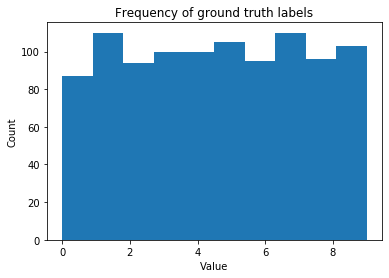

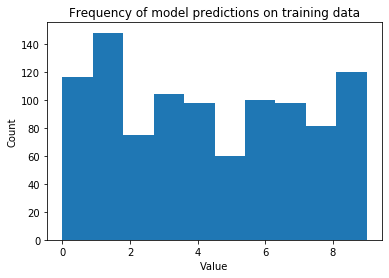

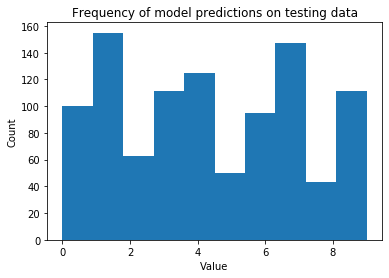

In [5]:
# Learn an output layer plasticity rule
opts = Options(use_output_rule=True, gd_output_rule=True, gd_input=True)
scheme = UpdateScheme(update_misclassified=False, update_all_edges=True)
local_brain = FFLocalNet(n=784, m=10, l=1, w=1000, p=0.1, cap=100, options=opts, update_scheme=scheme)

losses, meta_train_acc, meta_test_acc, meta_stats = train_local_rule(
    X_train,
    y_train,
    local_brain,
    10,
    1,
    100,
    lr=1e-3,
    X_test=X_test,
    y_test=y_test,
    verbose=True)

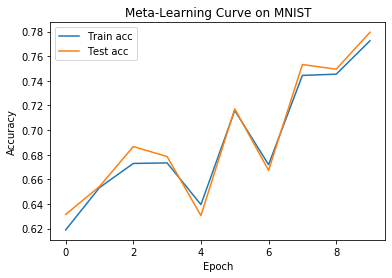

In [6]:
# Plot learning curves of meta-learning
plt.plot(np.reshape(meta_train_acc, -1), label='Train acc')
plt.plot(np.reshape(meta_test_acc, -1), label='Test acc')
plt.title('Meta-Learning Curve on MNIST')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now try plasticity-based training using the learned output rule:

Train on 0  examples.
Acc of class 0 :0.8560
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.6783
Train Accuracy: 0.1517
Acc of class 0 :0.8490
Acc of class 1 :0.0000
Acc of class 2 :0.0000
Acc of class 3 :0.0000
Acc of class 4 :0.0000
Acc of class 5 :0.0000
Acc of class 6 :0.0000
Acc of class 7 :0.0000
Acc of class 8 :0.0000
Acc of class 9 :0.7166
Test Accuracy: 0.1555
Train on 500  examples.
Acc of class 0 :0.9607
Acc of class 1 :0.9742
Acc of class 2 :0.7979
Acc of class 3 :0.8216
Acc of class 4 :0.8304
Acc of class 5 :0.5942
Acc of class 6 :0.9066
Acc of class 7 :0.8892
Acc of class 8 :0.6428
Acc of class 9 :0.7532
Train Accuracy: 0.8216
Acc of class 0 :0.9755
Acc of class 1 :0.9771
Acc of class 2 :0.7955
Acc of class 3 :0.8257
Acc of class 4 :0.8299
Acc of class 5 :0.6043
Acc of class 6 :0.8862
Acc of class 7 :0.8716
Acc of class

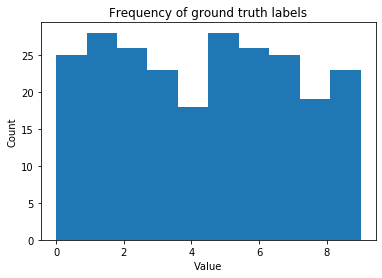

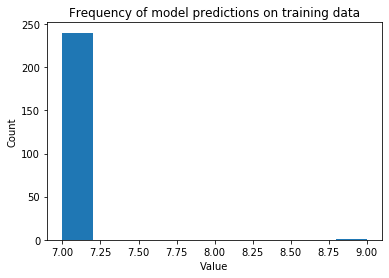

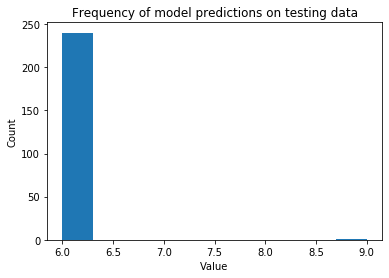

In [37]:
# NOTE: The output weights will be automatically reset during the first sample within train_given_rule()
X_train_2 = np.repeat(X_train, 2, axis=0)
y_train_2 = np.repeat(y_train, 2, axis=0)
plas_train_acc, plas_test_acc, plas_other_stats = train_given_rule(X_train_2, y_train_2, local_brain, verbose=True, X_test=X_test, y_test=y_test)

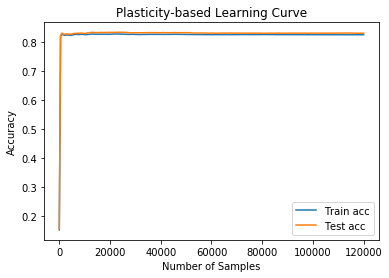

In [38]:
# Plot the learning curves of plasticity-based learning
tot_samples = (len(plas_train_acc) - 1) * 500
plas_samples = np.linspace(0, tot_samples, len(plas_train_acc))

plt.plot(plas_samples, plas_train_acc, label='Train acc')
plt.plot(plas_samples, plas_test_acc, label='Test acc')
plt.title('Plasticity-based Learning Curve')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

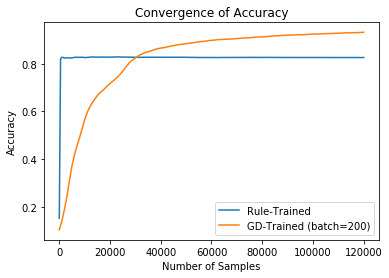

In [39]:
# Compare the learning curves
plt.plot(plas_samples, plas_train_acc, label='Rule-Trained')
plt.plot(gd_samples, gd_accuracies, label='GD-Trained (batch=200)')
plt.title('Convergence of Accuracy')
plt.xlabel('Number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

---